## Multi Armed Bandit - Epsilon Greedy


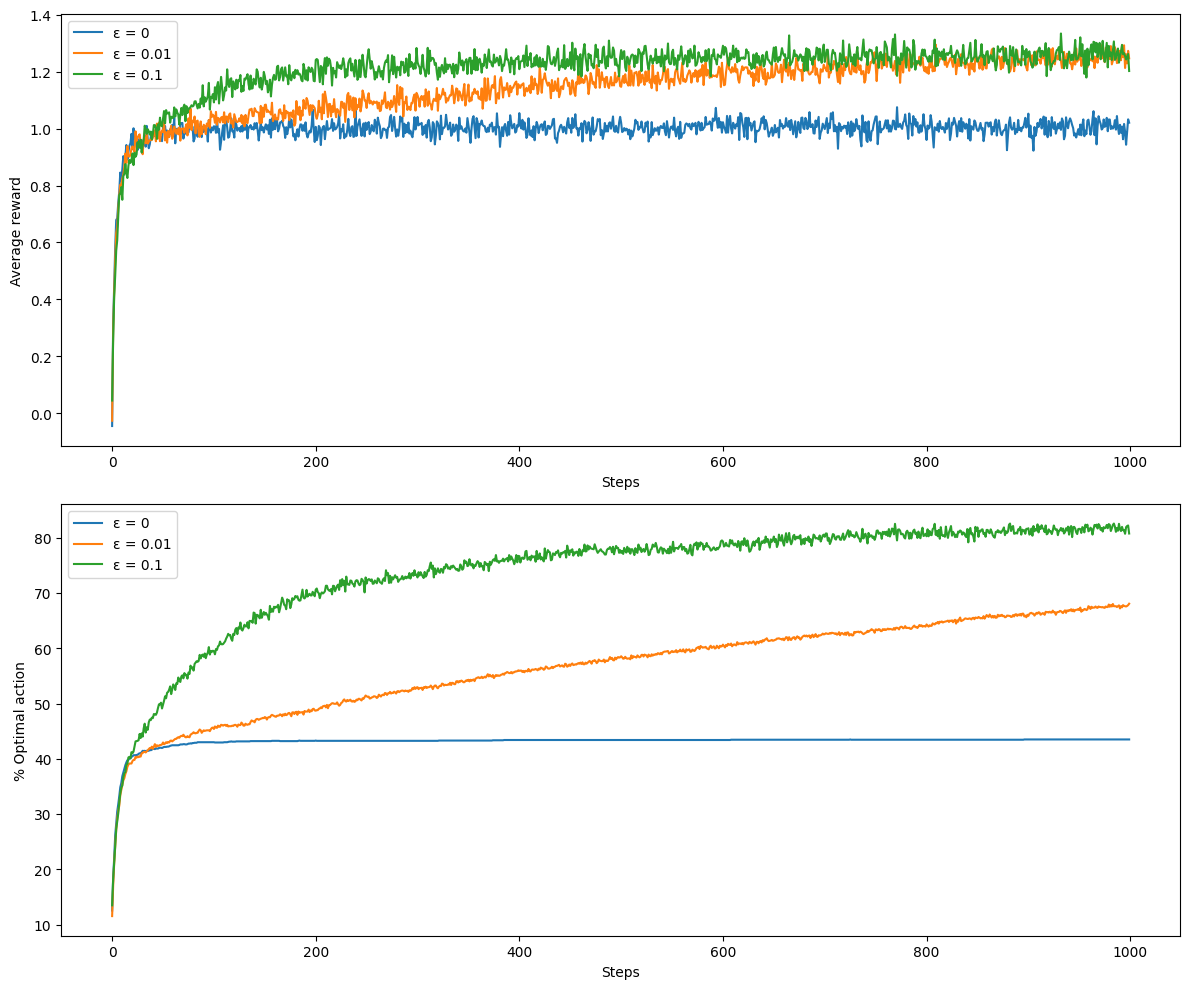

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Bandit:
    def __init__(self, n_arms=10):
        self.n_arms = n_arms
        # Initialize true values of actions (slot machines) randomly from a normal distribution
        self.action_values = np.random.normal(0, 1, n_arms)
        # Initialize estimated values of actions to zeros
        self.est_values = np.zeros(n_arms)
        # Initialize number of times each action was chosen to zeros
        self.n_selected = np.zeros(n_arms)

    def get_reward(self, action):
        # Randomly sample a reward based on the true value of the selected action
        reward = np.random.normal(self.action_values[action], 1)
        return reward

    def select_action(self, epsilon):
        if np.random.rand() > epsilon:
            # Exploit: Choose action with the highest estimated value
            action = np.random.choice(np.flatnonzero(self.est_values == self.est_values.max()))
        else:
            # Explore: Choose a random action
            action = np.random.choice(np.arange(self.n_arms))
        return action

    def update_estimates(self, action, reward):
        # Update the estimates using sample averages
        self.n_selected[action] += 1
        self.est_values[action] += (reward - self.est_values[action]) / self.n_selected[action]

# Simulation parameters
n_arms = 8  # Number of slot machines
steps = 1000  # Number of steps in each simulation
epsilons = [0, 0.01, 0.1]  # List of epsilon values for epsilon-greedy algorithm
runs = 2000  # Number of simulations

# Recording arrays for average rewards and optimal action percentages
average_rewards = {eps: np.zeros(steps) for eps in epsilons}
optimal_action_counts = {eps: np.zeros(steps) for eps in epsilons}

# Simulate multiple runs of bandit problems
for run in range(runs):
    # Create bandit instances for each epsilon value
    bandits = {eps: Bandit(n_arms) for eps in epsilons}
    # Iterate over steps in each simulation
    for step in range(steps):
        # Iterate over epsilon values
        for eps in epsilons:
            # Select action using epsilon-greedy strategy
            bandit = bandits[eps]
            action = bandit.select_action(eps)
            # Get reward for selected action
            reward = bandit.get_reward(action)
            # Update estimated values based on received reward
            bandit.update_estimates(action, reward)
            # Record average rewards and optimal action selections
            average_rewards[eps][step] += reward
            optimal_action_counts[eps][step] += action == np.argmax(bandit.action_values)

# Average results over runs
for eps in epsilons:
    average_rewards[eps] /= runs
    optimal_action_counts[eps] = (optimal_action_counts[eps] / runs) * 100

# Plot results
plt.figure(figsize=(12, 10))

# Plot average rewards
plt.subplot(2, 1, 1)
for eps in epsilons:
    plt.plot(average_rewards[eps], label=f'ε = {eps}')
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.legend()

# Plot percentage of optimal action selections
plt.subplot(2, 1, 2)
for eps in epsilons:
    plt.plot(optimal_action_counts[eps], label=f'ε = {eps}')
plt.xlabel('Steps')
plt.ylabel('% Optimal action')
plt.legend()

plt.tight_layout()
plt.show()
